# 4. El FC Barcelona es más ayudado que el Real Madrid por los árbitros

In [46]:
#Importamos librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Importamos el csv
df = pd.read_csv("data/Matches.csv") 

df

C:\Users\david\AppData\Local\Temp\ipykernel_8320\127379129.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Matches.csv")


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,17:30:00,Cartagena,Mirandes,1339.21,1544.15,3.0,6.0,7.0,...,2.40,1.8,1.95,1.85,0.0209,0.0118,0.0099,0.8084,0.1386,0.0104
230553,SP2,2025-06-01,17:30:00,Almeria,Tenerife,1544.16,1433.67,4.0,10.0,1.0,...,2.55,-1.8,1.80,2.00,0.3799,0.0630,0.2806,0.0160,0.2332,0.0274
230554,SP2,2025-06-01,17:30:00,La Coruna,Elche,1473.67,1569.98,0.0,3.0,3.0,...,2.63,1.3,1.78,2.03,0.0224,0.7482,0.0100,0.1201,0.0180,0.0813
230555,SP2,2025-06-01,17:30:00,Oviedo,Cadiz,1574.90,1525.76,7.0,13.0,6.0,...,1.51,-0.8,1.95,1.85,0.2070,0.2490,0.2334,0.0211,0.2634,0.0261


In [4]:
#observamos las columnas que tiene el df
df.columns

Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw',
       'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize',
       'HandiHome', 'HandiAway', 'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB',
       'C_PHB'],
      dtype='object')

In [5]:
#Eliminamos las últimas columnas que no aportan nada 
df = df.iloc[:,:-16]

In [6]:
#Eliminamos más columnas innecesarias
df = df.drop(columns=["MatchTime", "AwayElo","HomeElo","Form3Home","Form5Home","Form3Away","Form5Away"])

In [7]:
#Comprobamos que se han quedado las columnas que necesitamos
df.columns

Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots',
       'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
       'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed',
       'OddHome', 'OddDraw', 'OddAway'],
      dtype='object')

In [8]:
#comprobamos que están las columnas que queremos usar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     230557 non-null  object 
 1   MatchDate    230557 non-null  object 
 2   HomeTeam     230557 non-null  object 
 3   AwayTeam     230557 non-null  object 
 4   FTHome       230554 non-null  float64
 5   FTAway       230554 non-null  float64
 6   FTResult     230554 non-null  object 
 7   HTHome       175977 non-null  float64
 8   HTAway       175977 non-null  float64
 9   HTResult     175977 non-null  object 
 10  HomeShots    114735 non-null  float64
 11  AwayShots    114738 non-null  float64
 12  HomeTarget   113929 non-null  float64
 13  AwayTarget   113932 non-null  float64
 14  HomeFouls    113973 non-null  float64
 15  AwayFouls    113973 non-null  float64
 16  HomeCorners  114363 non-null  float64
 17  AwayCorners  114363 non-null  float64
 18  HomeYellow   119298 non-

In [9]:
#creamos una mascara donde aparezcan los partidos del Barsa
mascara_barsa = (df["HomeTeam"] == "Barcelona") | (df["AwayTeam"] == "Barcelona")

In [10]:
#creamos el df donde aparezcan los partidos del Barsa
df_barsa_amarillas = df[mascara_barsa]

In [11]:
#comprobamos que están las columnas que queremos usar 
df_barsa_amarillas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 503 to 230535
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     901 non-null    object 
 1   MatchDate    901 non-null    object 
 2   HomeTeam     901 non-null    object 
 3   AwayTeam     901 non-null    object 
 4   FTHome       901 non-null    float64
 5   FTAway       901 non-null    float64
 6   FTResult     901 non-null    object 
 7   HTHome       901 non-null    float64
 8   HTAway       901 non-null    float64
 9   HTResult     901 non-null    object 
 10  HomeShots    722 non-null    float64
 11  AwayShots    722 non-null    float64
 12  HomeTarget   722 non-null    float64
 13  AwayTarget   722 non-null    float64
 14  HomeFouls    722 non-null    float64
 15  AwayFouls    722 non-null    float64
 16  HomeCorners  722 non-null    float64
 17  AwayCorners  722 non-null    float64
 18  HomeYellow   722 non-null    float64
 19  AwayYell

In [12]:
#quitamos los null que justo son en amonestaciones
df_barsa_amarillas.dropna(inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_8320\2761443801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barsa_amarillas.dropna(inplace=True)


In [13]:
#comprobamos que ya no quedan nulos
df_barsa_amarillas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 27997 to 230535
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     722 non-null    object 
 1   MatchDate    722 non-null    object 
 2   HomeTeam     722 non-null    object 
 3   AwayTeam     722 non-null    object 
 4   FTHome       722 non-null    float64
 5   FTAway       722 non-null    float64
 6   FTResult     722 non-null    object 
 7   HTHome       722 non-null    float64
 8   HTAway       722 non-null    float64
 9   HTResult     722 non-null    object 
 10  HomeShots    722 non-null    float64
 11  AwayShots    722 non-null    float64
 12  HomeTarget   722 non-null    float64
 13  AwayTarget   722 non-null    float64
 14  HomeFouls    722 non-null    float64
 15  AwayFouls    722 non-null    float64
 16  HomeCorners  722 non-null    float64
 17  AwayCorners  722 non-null    float64
 18  HomeYellow   722 non-null    float64
 19  AwayYe

In [14]:
#sacamos:
Am_Recib_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeYellow"].sum()

print(Am_Recib_H_Bar) #Amarillas Recibidas en Casa

Falt_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeFouls"].sum()

print(Falt_H_Bar) #Faltas realizadas en Casa

Falt_Ama_H_Bar = Falt_H_Bar/Am_Recib_H_Bar

print(Falt_Ama_H_Bar)

613.0
4167.0
6.797716150081566


In [15]:
#sacamos:
Am_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayYellow"].sum()

print(Am_Rival_H_Bar) #Amarillas Recibidas por el rival en casa del barsa

Falt_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayFouls"].sum()

print(Falt_Rival_H_Bar) #Falyas realizadas por el rival en casa del barsa

Falt_Ama_H_Riv_Bar = Falt_Rival_H_Bar/Am_Rival_H_Bar

print(Falt_Ama_H_Riv_Bar)

955.0
5207.0
5.452356020942409


In [16]:
#sacamos:
Am_Recib_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayYellow"].sum()


print(Am_Recib_A_Bar)  #Amarillas Recibidas fuera de casa

Falt_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayFouls"].sum()


print(Falt_A_Bar)  #Faltas Realizadas fuera de casa

Falt_Ama_A_Bar = Falt_A_Bar/Am_Recib_A_Bar

print(Falt_Ama_A_Bar)

788.0
4111.0
5.217005076142132


In [17]:
#sacamos:
Am_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeYellow"].sum()

print(Am_Rival_A_Bar)  #Amarillas Recibidas por el rival en casa

Falt_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeFouls"].sum()

print(Falt_Rival_A_Bar)  #Amarillas Recibidas por el rival en casa

Falt_Ama_A_Riv_Bar = Falt_Rival_A_Bar/Am_Rival_A_Bar

print(Falt_Ama_A_Riv_Bar)


957.0
5751.0
6.009404388714733


In [18]:
#sacamos:
Ro_Recib_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","HomeRed"].sum()
print(Ro_Recib_H_Bar) #Rojas Recibidas en Casa

Falt_Ro_H_Bar = Falt_H_Bar/Ro_Recib_H_Bar #proporcion Faltas realizadas por tarjetas rojas recibidas en casa del Barsa

print(Falt_Ro_H_Bar)

26.0
160.26923076923077


In [19]:
Ro_Rival_H_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["HomeTeam"] == "Barcelona","AwayRed"].sum()
print(Ro_Rival_H_Bar) #Rojas Recibidas por el rival en casa del barsa

Falt_Ro_H_Riv_Bar = Falt_Rival_H_Bar/Ro_Rival_H_Bar #proporcion Faltas realizadas por tarjetas rojas recibidas el rival en casa del Barsa

print(Falt_Ro_H_Riv_Bar)

50.0
104.14


In [20]:
Ro_Recib_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","AwayRed"].sum()
print(Ro_Recib_A_Bar)  #Rojas Recibidas fuera de casa

Falt_Ro_A_Bar = Falt_A_Bar/Ro_Recib_A_Bar #proporcion Faltas realizadas por tarjetas rojas recibidas fuera de casa del Barsa

print(Falt_Ro_A_Bar)

39.0
105.41025641025641


In [21]:
Ro_Rival_A_Bar = df_barsa_amarillas.loc[df_barsa_amarillas["AwayTeam"] == "Barcelona","HomeRed"].sum()
print(Ro_Rival_A_Bar)  #Rojas Recibidas por el rival en casa

Falt_Ro_A_Riv_Bar = Falt_Rival_A_Bar/Ro_Rival_A_Bar #proporcion Faltas realizadas por tarjetas rojas recibidas al rival fuera de casa del Barsa

print(Falt_Ro_A_Riv_Bar)

67.0
85.83582089552239


In [ ]:
#sacamos la mascara de partidos del Real Madrid
mascara_RM = (df["HomeTeam"] == "Real Madrid") | (df["AwayTeam"] == "Real Madrid")

In [23]:
#sacamos df de los partidos del Real Madrid
df_RM_amarillas = df[mascara_RM]

In [24]:
#comprobamos los nulos y los quitamos
df_RM_amarillas.info()

df_RM_amarillas.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 505 to 230485
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     902 non-null    object 
 1   MatchDate    902 non-null    object 
 2   HomeTeam     902 non-null    object 
 3   AwayTeam     902 non-null    object 
 4   FTHome       902 non-null    float64
 5   FTAway       902 non-null    float64
 6   FTResult     902 non-null    object 
 7   HTHome       902 non-null    float64
 8   HTAway       902 non-null    float64
 9   HTResult     902 non-null    object 
 10  HomeShots    722 non-null    float64
 11  AwayShots    722 non-null    float64
 12  HomeTarget   722 non-null    float64
 13  AwayTarget   722 non-null    float64
 14  HomeFouls    722 non-null    float64
 15  AwayFouls    722 non-null    float64
 16  HomeCorners  722 non-null    float64
 17  AwayCorners  722 non-null    float64
 18  HomeYellow   722 non-null    float64
 19  AwayYell

C:\Users\david\AppData\Local\Temp\ipykernel_8320\1868571341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RM_amarillas.dropna(inplace=True)


In [25]:
#comprobamos que nos hemos quedado sin nulos
df_RM_amarillas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 28045 to 230485
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Division     722 non-null    object 
 1   MatchDate    722 non-null    object 
 2   HomeTeam     722 non-null    object 
 3   AwayTeam     722 non-null    object 
 4   FTHome       722 non-null    float64
 5   FTAway       722 non-null    float64
 6   FTResult     722 non-null    object 
 7   HTHome       722 non-null    float64
 8   HTAway       722 non-null    float64
 9   HTResult     722 non-null    object 
 10  HomeShots    722 non-null    float64
 11  AwayShots    722 non-null    float64
 12  HomeTarget   722 non-null    float64
 13  AwayTarget   722 non-null    float64
 14  HomeFouls    722 non-null    float64
 15  AwayFouls    722 non-null    float64
 16  HomeCorners  722 non-null    float64
 17  AwayCorners  722 non-null    float64
 18  HomeYellow   722 non-null    float64
 19  AwayYe

In [26]:
#sacamos:

Am_Recib_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeYellow"].sum()

print(Am_Recib_H_RM) #Amarillas Recibidas por el Real Madrid en casa

Falt_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeFouls"].sum()

print(Falt_H_RM) #Faltas del Real Madrid en casa

Falt_Ama_H_RM = Falt_H_RM/Am_Recib_H_RM

print(Falt_Ama_H_RM)

670.0
4497.0
6.7119402985074625


In [27]:
#sacamos:
Am_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayYellow"].sum()

print(Am_Rival_H_RM) #Amarillas Recibidas por el rival en casa del RM

Falt_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayFouls"].sum()

print(Falt_Rival_H_RM) #Faltas Realizadas por el rival en casa del RM

Falt_Ama_H_Riv_RM = Falt_Rival_H_RM/Am_Rival_H_RM

print(Falt_Ama_H_Riv_RM)

887.0
5133.0
5.786922209695603


In [28]:
#sacamos:
Am_Recib_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayYellow"].sum()

print(Am_Recib_A_RM) #Amarillas Recibidas por el Real Madrid fuera de casa

Falt_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayFouls"].sum()

print(Falt_A_RM) #Faltas realizadas por el Real Madrid fuera de casa

Falt_Ama_A_RM = Falt_A_RM/Am_Recib_A_RM

print(Falt_Ama_A_RM)

857.0
4554.0
5.313885647607934


In [29]:
#sacamos:
Am_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeYellow"].sum()

print(Am_Rival_A_RM) #Amarillas Recibidas por el rival en casa

Falt_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeFouls"].sum()

print(Falt_Rival_A_RM) #Amarillas Recibidas por el rival en casa

Falt_Ama_A_Riv_RM = Falt_Rival_A_RM/Am_Rival_A_RM

print(Falt_Ama_A_Riv_RM)


1029.0
5700.0
5.539358600583091


In [ ]:
Ro_Recib_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","HomeRed"].sum()
print(Ro_Recib_H_RM) #amarillas recibidas en casa al Real Madrid

Falt_Ro_H_RM = Falt_H_RM/Ro_Recib_H_RM #proporcion Faltas realizadas por tarjetas rojas recibidas al Madrid en casa 

print(Falt_Ro_H_RM)

35.0
128.4857142857143


In [ ]:
Ro_Rival_H_RM = df_RM_amarillas.loc[df_RM_amarillas["HomeTeam"] == "Real Madrid","AwayRed"].sum()
print(Ro_Rival_H_RM) #rojas recibidas por el rival en casa del Real Madrid 

Falt_Ro_H_Riv_RM = Falt_Rival_H_RM/Ro_Rival_H_RM #proporcion Faltas realizadas por tarjetas rojas recibidas al rival en casa del Madrid

print(Falt_Ro_H_Riv_RM)

46.0
111.58695652173913


In [ ]:
Ro_Recib_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","AwayRed"].sum()
print(Ro_Recib_A_RM) #rojas recibidas fuera de casa al Real Madrid

Falt_Ro_A_RM = Falt_H_RM/Ro_Recib_A_RM #proporcion Faltas realizadas por tarjetas rojas recibidas al Madrid fuera de casa
print(Falt_Ro_A_RM)

54.0
83.27777777777777


In [ ]:
Ro_Rival_A_RM = df_RM_amarillas.loc[df_RM_amarillas["AwayTeam"] == "Real Madrid","HomeRed"].sum()
print(Ro_Rival_A_RM) #rojas recibidas por el rival fuera de casa del Real Madrid

Falt_Ro_A_Riv_RM = Falt_Rival_A_RM/Ro_Rival_A_RM #proporcion Faltas realizadas por tarjetas rojas recibidas por el rival fuera de casa del Madrid

print(Falt_Ro_A_Riv_RM)

47.0
121.27659574468085


In [34]:
#sacamos una mascara que quite los partidos del Madrid y del Barsa en la liga española
mask_resto_liga_sanciones = (df["Division"] == "SP1") & (df["HomeTeam"] != "Real Madrid") & (df["HomeTeam"] != "Barcelona") & (df["AwayTeam"] != "Real Madrid") & (df["AwayTeam"] != "Barcelona") 

In [35]:
#creamos el df y limpiamos los nulos
df_resto_liga = df[mask_resto_liga_sanciones]

df_resto_liga = df_resto_liga.dropna()

df_resto_liga

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
27998,SP1,2005-08-27,Ath Bilbao,Sociedad,3.0,0.0,H,0.0,0.0,D,...,19.0,3.0,4.0,0.0,1.0,0.0,0.0,2.00,3.25,3.25
27999,SP1,2005-08-27,Valencia,Betis,1.0,0.0,H,0.0,0.0,D,...,14.0,8.0,5.0,2.0,3.0,0.0,0.0,2.00,3.25,3.25
28044,SP1,2005-08-28,Ath Madrid,Zaragoza,0.0,0.0,D,0.0,0.0,D,...,22.0,8.0,4.0,2.0,7.0,0.0,0.0,1.72,3.40,4.00
28046,SP1,2005-08-28,Celta,Malaga,2.0,0.0,H,1.0,0.0,H,...,25.0,4.0,11.0,1.0,2.0,0.0,0.0,2.10,3.25,3.00
28047,SP1,2005-08-28,Espanol,Getafe,0.0,2.0,A,0.0,0.0,D,...,25.0,4.0,2.0,2.0,3.0,0.0,0.0,1.61,3.40,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230496,SP1,2025-05-24,Alaves,Osasuna,1.0,1.0,D,0.0,0.0,D,...,6.0,5.0,9.0,2.0,2.0,0.0,0.0,3.20,3.20,2.36
230497,SP1,2025-05-24,Getafe,Celta,1.0,2.0,A,1.0,1.0,D,...,10.0,2.0,6.0,3.0,4.0,1.0,0.0,4.22,3.65,1.86
230498,SP1,2025-05-24,Vallecano,Mallorca,0.0,0.0,D,0.0,0.0,D,...,14.0,11.0,2.0,2.0,2.0,0.0,0.0,1.53,4.10,6.46
230499,SP1,2025-05-25,Girona,Ath Madrid,0.0,4.0,A,0.0,0.0,D,...,11.0,1.0,8.0,0.0,1.0,0.0,0.0,3.71,3.75,1.95


In [36]:
#sacamos la media de las estadísticas para compararlas con Real Madrid y Barsa
media_fal_am_local = df_resto_liga["HomeFouls"].mean()/df_resto_liga["HomeYellow"].mean()

print(media_fal_am_local)

media_fal_am_visit = df_resto_liga["AwayFouls"].mean()/df_resto_liga["AwayYellow"].mean()

print(media_fal_am_visit)

media_fal_ro_local = df_resto_liga["HomeFouls"].mean()/df_resto_liga["HomeRed"].mean()

print(media_fal_ro_local)

media_fal_ro_visit = df_resto_liga["AwayFouls"].mean()/df_resto_liga["AwayRed"].mean()

print(media_fal_ro_visit)

5.973363241272957
5.427009155645982
109.53213367609256
88.36024844720498


In [37]:
#Creamos un df de los datos obtenidos de tarjetas amarillas
Real_Madrid_amarillas = pd.Series([Falt_Ama_H_RM,Falt_Ama_H_Riv_RM,Falt_Ama_A_Riv_RM, Falt_Ama_A_RM], name = "Real Madrid")

Barsa_amarillas = pd.Series([Falt_Ama_H_Bar,Falt_Ama_H_Riv_Bar, Falt_Ama_A_Riv_Bar,Falt_Ama_A_Bar], name = "Barsa")

Resto_liga_amarillas =pd.Series([media_fal_am_local,media_fal_am_visit, media_fal_am_local, media_fal_am_visit], name ="Media liga")

df_amarillas = pd.concat([Real_Madrid_amarillas, Barsa_amarillas, Resto_liga_amarillas],axis =1)

df_amarillas

,Real Madrid,Barsa,Media liga
0,6.711940,6.797716,5.973363
1,5.786922,5.452356,5.427009
2,5.539359,6.009404,5.973363
3,5.313886,5.217005,5.427009


In [38]:
##ponemos nombre a los índices trasponemos
df_amarillas = df_amarillas.rename(index={0:"Faltas realizadas/TA(como local)",1:"Faltas recibidas/TA Riv(como Local)",2:"Faltas recibidas/TA Riv (como Visitante)",3:"Faltas realizadas/TA (como Visitante)"})

df_amarillas.transpose().round(2)

,Faltas realizadas/TA(como local),Faltas recibidas/TA Riv(como Local),Faltas recibidas/TA Riv (como Visitante),Faltas realizadas/TA (como Visitante)
Real Madrid,6.71,5.79,5.54,5.31
Barsa,6.80,5.45,6.01,5.22
Media liga,5.97,5.43,5.97,5.43


In [39]:
df_amarillas.index.tolist()

['Faltas realizadas/TA(como local)',
 'Faltas recibidas/TA Riv(como Local)',
 'Faltas recibidas/TA Riv (como Visitante)',
 'Faltas realizadas/TA (como Visitante)']

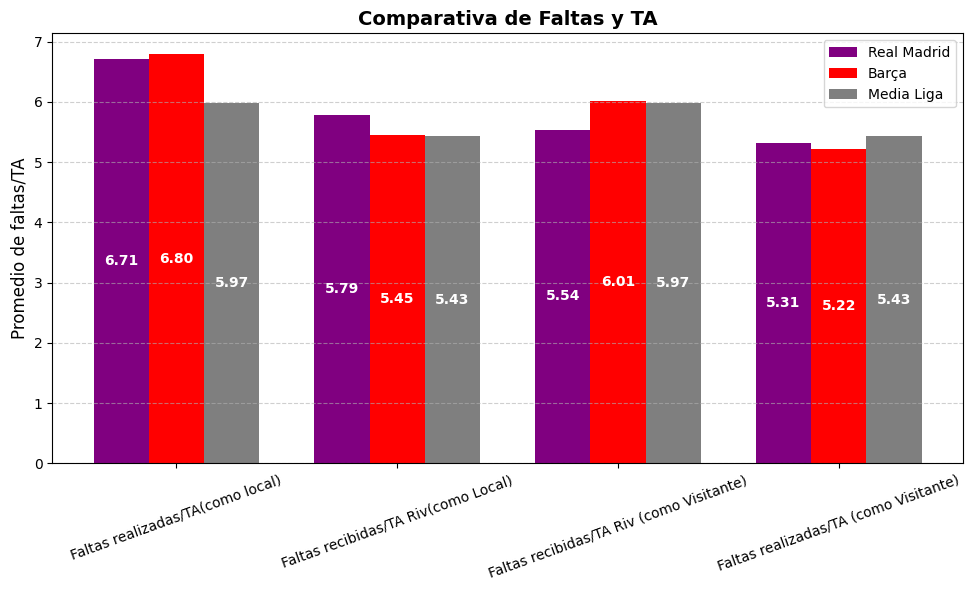

In [40]:
#creamos el gráfico de tarjetas amarillas

estadisticas_amarillas = df_amarillas.index.tolist()

real_madrid = Real_Madrid_amarillas
barca = Barsa_amarillas
media_liga = Resto_liga_amarillas


x = np.arange(len(estadisticas_amarillas))
ancho = 0.25

plt.figure(figsize=(10, 6))


bars_rm = plt.bar(x - ancho, real_madrid, width=ancho, label="Real Madrid",color="#800080")
bars_barca = plt.bar(x, barca, width=ancho, label="Barça", color = "red")
bars_media = plt.bar(x + ancho, media_liga, width=ancho, label="Media Liga", color = "#7F7F7F")


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height/2,                         
            f"{height:.2f}",                  
            ha='center', va='center', color='white', fontsize=10, fontweight='bold'
        )

add_labels(bars_rm)
add_labels(bars_barca)
add_labels(bars_media)


plt.xticks(x, estadisticas_amarillas, rotation=20, fontsize=10)
plt.ylabel("Promedio de faltas/TA", fontsize=12)
plt.title("Comparativa de Faltas y TA", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [41]:
#creamos el df de tarjetas rojas
Real_Madrid_rojas = pd.Series ([Falt_Ro_H_RM, Falt_Ro_H_Riv_RM,  Falt_Ro_A_Riv_RM, Falt_Ro_A_RM], name = "Real Madrid")
Barsa_rojas = pd.Series ([Falt_Ro_H_Bar, Falt_Ro_H_Riv_Bar, Falt_Ro_A_Riv_Bar, Falt_Ro_A_Bar], name = "Barsa")
Resto_liga_rojas = pd.Series ([media_fal_ro_local, media_fal_ro_visit, media_fal_ro_local, media_fal_ro_visit], name = "Media liga")
df_rojas = pd.concat([Real_Madrid_rojas, Barsa_rojas, Resto_liga_rojas],axis =1)

df_rojas

,Real Madrid,Barsa,Media liga
0,128.485714,160.269231,109.532134
1,111.586957,104.140000,88.360248
2,121.276596,85.835821,109.532134
3,83.277778,105.410256,88.360248


In [42]:
##ponemos nombre a los índices y trasponemos
df_rojas = df_rojas.rename(index={0:"Faltas realizadas/TR(como local)",1:"Faltas recibidas/TR Riv(como Local)",2:"Faltas recibidas/TR Riv (como Visitante)",3:"Faltas realizadas/TR (como Visitante)"}) 

df_rojas.transpose().round(2)

,Faltas realizadas/TR(como local),Faltas recibidas/TR Riv(como Local),Faltas recibidas/TR Riv (como Visitante),Faltas realizadas/TR (como Visitante)
Real Madrid,128.49,111.59,121.28,83.28
Barsa,160.27,104.14,85.84,105.41
Media liga,109.53,88.36,109.53,88.36


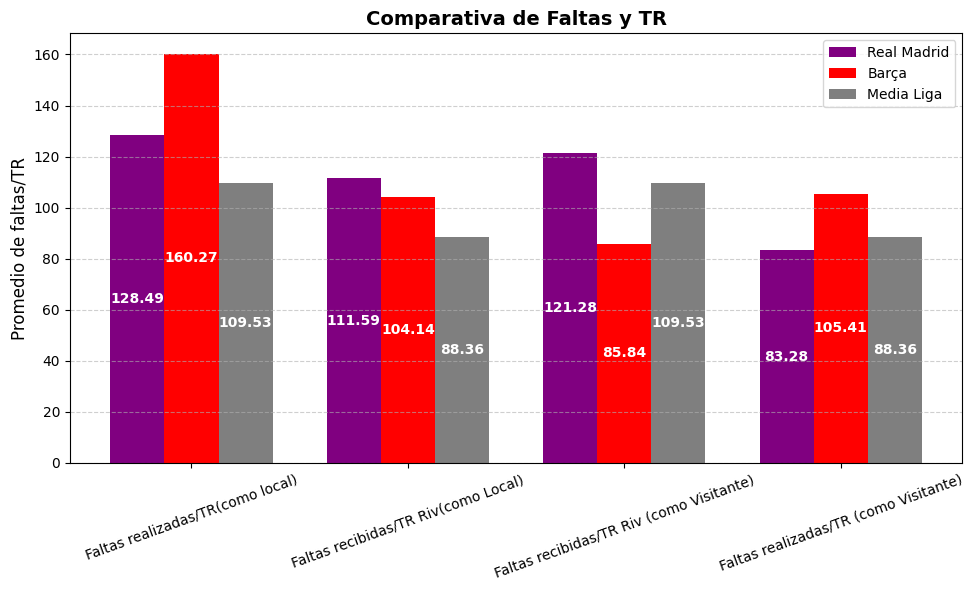

In [43]:
#creamos el gráfico de tarjetas rojas


estadisticas_rojas = df_rojas.index.tolist()

real_madrid = Real_Madrid_rojas
barca = Barsa_rojas
media_liga = Resto_liga_rojas


x = np.arange(len(estadisticas_rojas))
ancho = 0.25

plt.figure(figsize=(10, 6))


bars_rm = plt.bar(x - ancho, real_madrid, width=ancho, label="Real Madrid",color="#800080")
bars_barca = plt.bar(x, barca, width=ancho, label="Barça", color = "red")
bars_media = plt.bar(x + ancho, media_liga, width=ancho, label="Media Liga", color = "#7F7F7F")


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,  
            height/2,                         
            f"{height:.2f}",                  
            ha='center', va='center', color='white', fontsize=10, fontweight='bold'
        )

add_labels(bars_rm)
add_labels(bars_barca)
add_labels(bars_media)


plt.xticks(x, estadisticas_rojas, rotation=20, fontsize=10)
plt.ylabel("Promedio de faltas/TR", fontsize=12)
plt.title("Comparativa de Faltas y TR", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
#diferencia entre la media de la liga y el Real Madrid
RM_diferenciaTR_medialiga = ((Real_Madrid_rojas - Resto_liga_rojas)/Resto_liga_rojas)*100

RM_diferenciaTR_medialiga

0    17.304128
1    26.286377
2    10.722390
3    -5.751988
dtype: float64

In [ ]:
#diferencia entre la media de la liga y el Barsa
B_diferenciaTR_medialiga = ((Barsa_rojas - Resto_liga_rojas)/Resto_liga_rojas)*100

B_diferenciaTR_medialiga

0    46.321655
1    17.858428
2   -21.634120
3    19.296016
dtype: float64

In [ ]:
#creamos el df y renombramos índices

df_diferencia = pd.concat([RM_diferenciaTR_medialiga,B_diferenciaTR_medialiga], axis= 1)

df_diferencia = df_diferencia.rename(index={0:"Faltas realizadas/TR(como local)",1:"Faltas recibidas/TR Riv(como Local)",2:"Faltas recibidas/TR Riv (como Visitante)",3:"Faltas realizadas/TR (como Visitante)"}) 

df_diferencia = df_diferencia.transpose().rename(index={0:"Real Madrid",1: "Barsa"})

df_diferencia.round(2)

,Faltas realizadas/TR(como local),Faltas recibidas/TR Riv(como Local),Faltas recibidas/TR Riv (como Visitante),Faltas realizadas/TR (como Visitante)
Real Madrid,17.30,26.29,10.72,-5.75
Barsa,46.32,17.86,-21.63,19.30


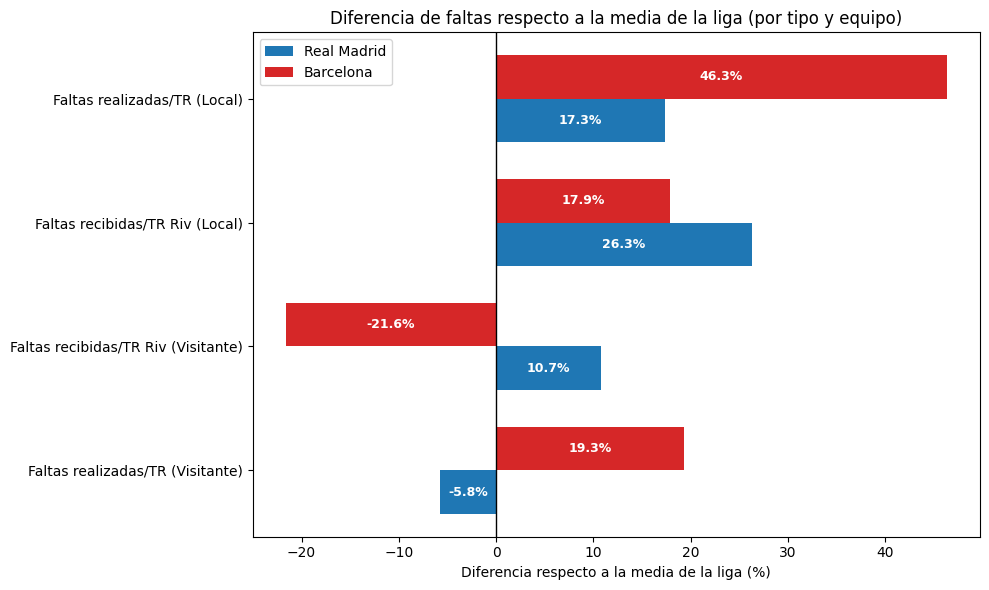

In [ ]:
#hacemos el gráfico para que se vean mejor las diferencias
data_diff = {
    'Métrica': [
        'Faltas realizadas/TR (Local)',
        'Faltas recibidas/TR Riv (Local)',
        'Faltas recibidas/TR Riv (Visitante)',
        'Faltas realizadas/TR (Visitante)'
    ],
    'Real Madrid':RM_diferenciaTR_medialiga ,
    'Barcelona': B_diferenciaTR_medialiga
}

df = pd.DataFrame(data_diff)


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(df))


bars_rm = ax.barh([i + bar_width/2 for i in x], df['Real Madrid'], bar_width, label='Real Madrid', color='#1f77b4')
bars_barsa = ax.barh([i - bar_width/2 for i in x], df['Barcelona'], bar_width, label='Barcelona', color='#d62728')


ax.axvline(0, color='black', linewidth=1)


ax.set_yticks(x)
ax.set_yticklabels(df['Métrica'])
ax.set_xlabel('Diferencia respecto a la media de la liga (%)')
ax.set_title('Diferencia de faltas respecto a la media de la liga (por tipo y equipo)')
ax.legend()


ax.invert_yaxis()


def label_inside(bars):
    for bar in bars:
        value = bar.get_width()
        text_color = 'white'
        ax.text(
            value / 2,                              
            bar.get_y() + bar.get_height() / 2,     
            f'{value:.1f}%',                        
            ha='center', va='center', color=text_color, fontsize=9, fontweight='bold'
        )

label_inside(bars_rm)
label_inside(bars_barsa)


plt.tight_layout()
plt.show()

# Conclusión

Se puede observar que en tarjetas amarillas mostradas no hay mucha diferencia entre la media de La Liga, el Real Madrid y el Barsa. Sin embargo, sí que se ve una clara diferencia en el trato arbitral con las tarjetas rojas. Para que echen a un jugador del Barsa en casa tiene que realizar 160 faltas mientras que el Madrid 128, siendo la media de La Liga 109. Aquí, el Barsa sale favorecido.

Sin embargo, los rivales en feudo contrario tienen que hacer 111 faltas al Real Madrid para que les explusen un jugador, mientras que al Barsa 104. En este caso, ambos por encima de la media y siendo el Barsa vuelto a ser favorecido.

Observando las estadísticas en campo visitante de Madrid y Barsa, podemos observar que para que expulsen a un jugador rival, al Madrid le tiene que hacer 121 faltas frente a las 85 que le tienen que hacer al Barsa. Estando el Barsa un 21% por debajo de la media de La Liga que son 109. Otra vez, el Barsa sale favorecido.

Asimismo, el Madrid tiene que realizar 83 faltas para que le expulsen a un jugador, estando por debajo de la media de La Liga que se necesita de promedio, 88 infracciones para ser expulsado. De nuevo, el Barsa sale favorecido en este dato, ya que para que un jugador de su equipo sea expulsado son necesarias 105 faltas.

Examinando las anteriores hipótesis, averiguamos que las tarjetas rojas eran un factor muy importante en el transcurso de un partido. Tras analizar este apartado y viendo la anomalía estadistica, se puede sacar en claro que el Barsa fue más ayudado por los árbitros que el Real Madrid.

Por lo tanto, la hipótesis de que El FC Barcelona es más ayudado que el Real Madrid por los árbitros es **correcta**